In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
personal_data = pd.read_csv("customer_data.csv")
campaign_data = pd.read_csv("campaign_data.csv")
join = personal_data.merge(campaign_data, on = 'index', how = "inner")
join

,index,Income,Kidhome,Teenhome,Recency,Complain,Age,Customer_Days,marital_Divorced,marital_Married,...,education_Basic,education_Graduation,education_Master,education_PhD,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,0,58138.0,0,0,58,0,63,2822,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,46344.0,1,1,38,0,66,2272,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2,71613.0,0,0,26,0,55,2471,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3,26646.0,1,0,26,0,36,2298,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,58293.0,1,0,94,0,39,2320,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,0,53,2540,0,1,...,0,1,0,0,0,0,0,0,0,0
2201,2201,64014.0,2,1,56,0,74,2178,0,0,...,0,0,0,1,0,0,0,1,0,0
2202,2202,56981.0,0,0,91,0,39,2314,1,0,...,0,1,0,0,0,1,0,0,0,0
2203,2203,69245.0,0,1,8,0,64,2315,0,0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
personal_data_column = personal_data.drop(columns=["index"]).columns.to_list()
campaign_data_column = campaign_data.drop(columns="index").columns.to_list()
campaign_data_column

['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']

In [72]:

correlation_matrix = join[personal_data_column + campaign_data_column].corr()
correlation_with_campaigns = correlation_matrix.loc[personal_data_column, campaign_data_column]
correlation_with_campaigns["Average campaign"] = correlation_with_campaigns[['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']].mean(axis = 1)


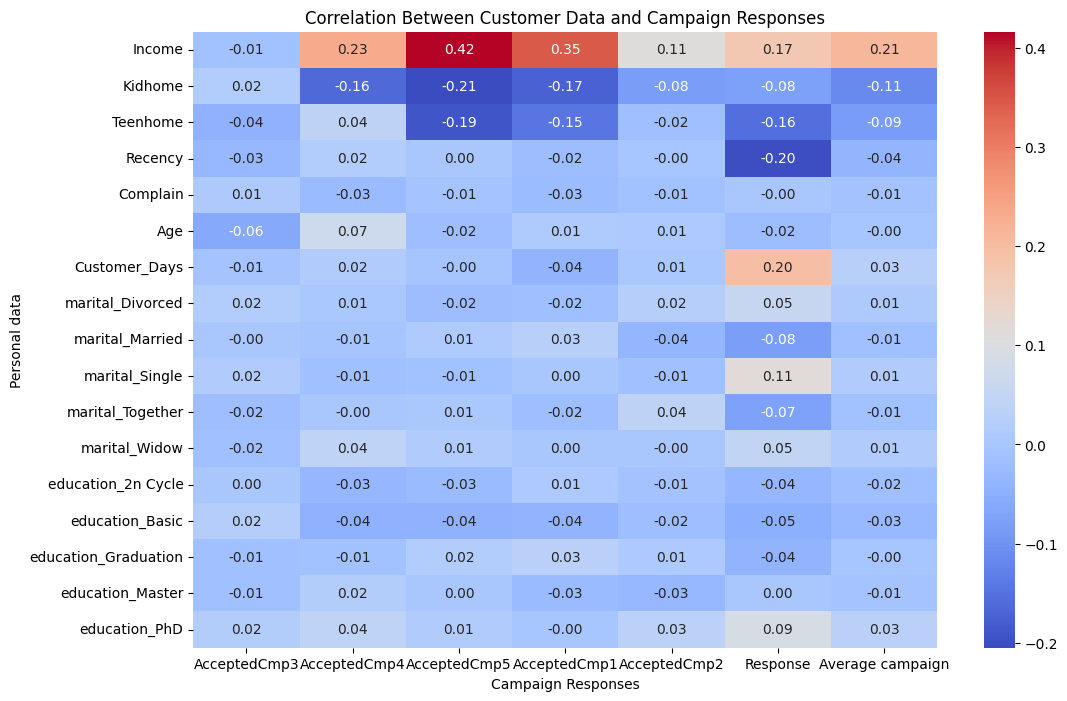

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_campaigns, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Between Customer Data and Campaign Responses')
plt.xlabel('Campaign Responses')
plt.ylabel('Personal data')
plt.show()